Dans le monde réel on trouve des phénomènes dus au "hasard", on dit des phénomènes aléatoires. Il peut être utile, parfois numériquement, de pouvoir modéliser et simuler ces phénomènes.

La simulation d'expériences aléatoires en Python peut être réalisée à l'aide du module $numpy.random$ permettant de générer des nombres aléatoires, tirer des échantillons aléatoires, et plus encore.

***Exemple 1 : Lancer d'un dé***

Le lancer d'un dé à six faces peut être vu comme un tirage aléatoire d'un nombre dans l'ensemble $\{1,2,3,4,5,6\}$.

Pour simuler cette expérience aléatoire on peut utiliser l'appel $randint(1, 7)$ qui renvoie un entier aléatoire de la distribution uniforme des entiers de $1$ (inclus) à $7$ (exclu).

In [2]:
import numpy as np

# Lancer un dé
x = np.random.randint(1, 7)
print(f"Résultat du lancer de dé : {x}")

Résultat du lancer de dé : 3


Pour simuler 5 lancers d'un dé et afficher le résultat chaque fois :

In [3]:
for i in range(1, 6):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 1 : 2
Lancer numéro 2 : 2
Lancer numéro 3 : 1
Lancer numéro 4 : 4
Lancer numéro 5 : 5


**Syntaxe générale**

$numpy.random.randint(min, max, size)$

- $min$ : Le plus petit entier à tirer de la distrubution (inclus);
- $max$ : Le plus grand entier à tirer de la distrubution (exclu);
- $size$ : nombre et forme de tirages.

**Exemples**

La simulation de cinq lancers peut être vue comme un vecteur de cinq entiers. Donc il suffit d'ajouter le nombre de tirages (5) :

In [6]:
lancers = np.random.randint(1, 7, 5)

print(lancers)

[1 6 4 3 5]


On peut aussi générer une matrice d'entiers en précisant le nombre de lignes et le nombre de colonnes. 

Pour simuler une partie entre deux joueurs et trois lancers successifs par joueurs, on a besoin de deux lignes (2 joueurs) et trois colonnes (3 lancers), soit une matrice (2,3) :

In [7]:
lancers = np.random.randint(1, 7, (2,3))

print(lancers)

[[5 1 3]
 [4 4 5]]


***Exemple 2 : Sélection aléatoire de personnes***


Le choix aléatoire d'une personne est un tirage d'un nom dans l'ensemble des noms. 

Pour simuler cette expérience aléatoire on peut utiliser l'appel $choice(noms)$ qui, dans ce cas, renvoie un nom aléatoire de la distribution uniforme des noms.

In [9]:
noms = ["Ahmad", "Sarah", "Fatima", "Omar", "Samia", "Ibrahim", "Abd Allah", "Assia", "Maryam"]

x = np.random.choice(noms)

print(x)

Omar


**Syntaxe générale**

$numpy.random.choice(array, size, replace, p)$

- $array$ : Éléments de l'expérience;
- $size$ : nombre et forme de tirages (1 par défaut);
- $replace$ : avec ou sans remise ($True$ par défaut);
- $p$ : probabilité associée à chaque élément (uniforme par défaut).

**Exemples**


In [10]:
# Tirer cinq personnes avec remise

x = np.random.choice(noms, 5)

print(x)

['Samia' 'Ahmad' 'Ahmad' 'Samia' 'Abd Allah']


In [11]:
# Tirer cinq personnes sans remise

x = np.random.choice(noms, 5, replace=False)

print(x)

['Abd Allah' 'Fatima' 'Assia' 'Omar' 'Ibrahim']


In [14]:
# Former trois groupes de trois personnes

x = np.random.choice(noms, (3,3), replace=False)

print(x)

[['Omar' 'Maryam' 'Ahmad']
 ['Samia' 'Abd Allah' 'Fatima']
 ['Sarah' 'Assia' 'Ibrahim']]


Pour favoriser le tirage d'une personne, on lui attribue la plus grande probabilité; on n'utilise plus une loi uniforme où $P(personne) = \frac{1}{nombre\_personnes}$. Dans ce cas la somme des probabilités doit valoir 1.


In [16]:
# Favoriser le tirage de "Maryam"

x = np.random.choice(noms, 5, p=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.6])

print(x)

['Maryam' 'Assia' 'Maryam' 'Assia' 'Maryam']


# Représentations graphiques

Pour juger de la pertinence des simulations, on peut utiliser des représentations graphiques. Pour cela, on procèdera comme suit :

- On crée un échantillon, c’est-à-dire une liste contenant plusieurs réalisations de la fonction Loi.
- On compare graphiquement les fréquences obtenues avec les probabilités théoriques; et pour un nombre de simulations suffisamment grand, les deux doivent être proches.

# Simulation de variables aléatoires discrètes 


## La loi de Bernoulli

Une expérience de $Bernoulli$ est une expérience aléatoire qui peut aboutir à deux résultats possibles :

- Succès (1) avec une probabilité $p$
- Échec (0) avec une probabilité $1 - p$

Si $X$ est une variable aléatoire suivant une loi de Bernoulli de paramètre $p$, on note $X\sim\mathcal{B}(p)$, et la fonction de masse de probabilité est donnée par :

$$P(X = 1) = p \> et \> P(X = 0) = 1-p$$

avec une espérance 

$$\mathbb{E}(X) = \sum_{x \in X(\Omega)} x P(X = x) = p$$

et une variance 

$$\mathbb{V}(X) = \mathbb{E}(X^2) - \mathbb{E}(X)^2 = p(1-p)$$


## La loi binomiale

La loi binomiale décrit le nombre de succès dans une série de $n$ expériences de Bernoulli indépendantes Si $X_1, X_2, \dots, X_n$ sont $n$ variables aléatoires indépendantes suivant chacune une loi de Bernoulli de paramètre $p$, alors la somme 
$$S_n = \sum_{i=1}^n X_i$$
suit une loi binomiale de paramètres $n$ et $p$, notée
$$S_n \sim \mathcal{B}(n, p)$$

La fonction de masse de probabilité de la loi binomiale est donnée par :
$$P(S_n = x) = \binom{n}{x} p^x (1-p)^{n-x}, \quad x = 0, 1, \dots, n.$$
Où $\binom{n}{x} = \frac{n!}{x!(n-x)!}$ est le coefficient binomial.

Dans ce cas l'espérance vaut $np$ et la variance vaut $np(1-p)$.

Pour simuler une variable aléatoire suivant une loi binomiale, on peut utiliser directement la fonction $numpy.random.binomial$.

### Syntaxe

$numpy.random.binomial(nombre, probabilit\acute{e}, taille)$

- $nombre$ : nombre d'essais (ou tirages de Bernoulli).
- $probabilit\acute{e}$ : probabilité de succès lors d'un essai.
- $taille$ : nombre de simulations (combien de variables aléatoires on veut générer).

*Remarque* : On peut simuler la loi de Bernoulli en donnant la valeur 1 comme nombre d'essais. 

La fonction renvoie une liste contenant le nombre de succès obtenus pour chaque simulation.

### Exemple 1

On suppose qu'un dé soit lancé une fois, et on considère un succès comme obtenir un nombre impair. La probabilité de succès est $\frac{1}{2}$. Cette expérience suit une loi de Bernoulli : $$X \sim \mathcal{B}({\textstyle\frac{1}{2}})$$


In [44]:
# Pour simuler un lancer

x = np.random.binomial(1, 0.5, 1)

print(x)

[0]


In [45]:
# Pour simuler trois lancer

x = np.random.binomial(1, 0.5, 3)

print(x)

[1 0 0]


Pour représenter graphiquement les résultats on utilise directement la fonction $matplotlib.pyplot.hist$ où les histogrammes se construisent à partir de la liste des valeurs renvoyée par la fonction $binomial$.

In [31]:
import matplotlib.pyplot as mpl

# Paramètres
p = 1/2          # Probabilité de succès
taille = 100_000 # Nombre de simulations

# Simulation
Liste = np.random.binomial(1, p, taille)

print(Liste)

[1 0 0 ... 1 1 1]


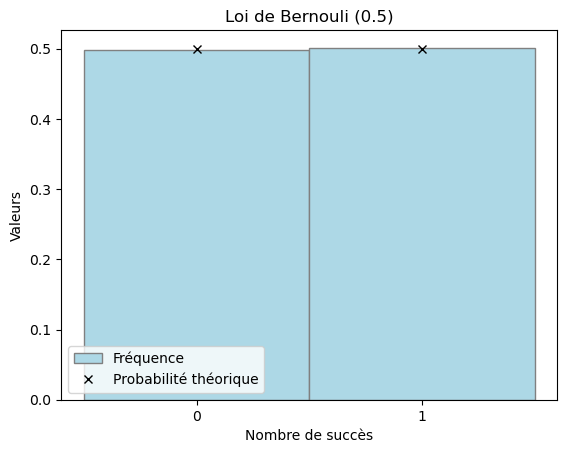

Espérance simulée : 0.50144
Espérance théorique : 0.5
Variance simulée : 0.2499979264
Variance théorique : 0.25


In [32]:
X = list(range(2)) # les abscisses 0 et 1

# Probabilités théoriques
P = [p, 1-p]

# Représentation graphique des fréquences
mpl.hist(Liste, X+[2], edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

# Représentation graphique des probabilités théoriques
mpl.plot(X, P, 'x', label='Probabilité théorique', color='black')

mpl.title(f"Loi de Bernouli ({p})")
mpl.xticks(X)
mpl.xlabel("Nombre de succès")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {p}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {p*(1-p)}")

### Exemple 2

On suppose maintenant qu'un dé soit lancé 10 fois. Le nombre total des nombres impairs obtenus après 10 lancers suit une loi binomiale : $$S_{10} \sim \mathcal{B}(10, {\textstyle\frac{1}{2}})$$

In [33]:
# Paramètres
n=10
p=1/2
taille=100_000

# Simulation
Liste = np.random.binomial(n, p, taille)

print(Liste)

[3 4 8 ... 7 4 7]


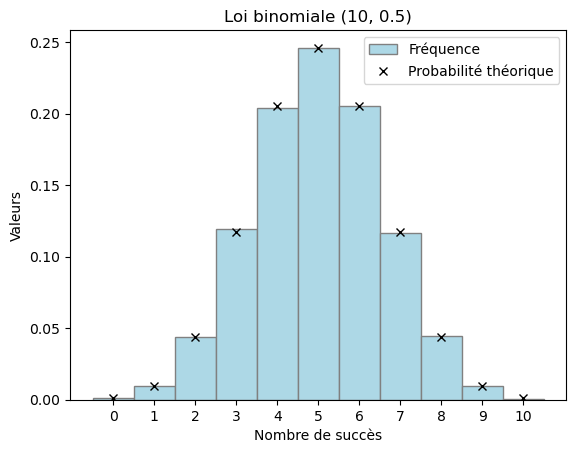

Espérance simulée : 4.9973
Espérance théorique : 5.0
Variance simulée : 2.50365271
Variance théorique : 2.5


In [34]:
# Fonction qui calcule la probabilité théorique en utilisant math.comb pour calculer le coefficient binomial
import math
def PBinomiale(x, n, p):
    return math.comb(n, x)*(p**x)*((1-p)**(n-x)) 

# Probabilités théoriques
P = [PBinomiale(i, n, p) for i in range(n+1)]

# Abscisses 
X = list(range(11))

# Représentation graphique des fréquences
mpl.hist(Liste, X+[11], edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

# Représentation graphique des probabilités théoriques
mpl.plot(X, P, 'x', label='Probabilité théorique', color='black')

mpl.title(f"Loi binomiale ({n}, {p})")
mpl.xticks(X)
mpl.xlabel("Nombre de succès")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {n*p}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {n*p*(1-p)}")

On observe graphiquement que l'aire de chaque rectangle de fréquence est proche de la probabilité théorique correspandante.

### Exercice

Un joueur marque un tir avec probabilité 0,7. 

1) Simuler 100 tirs.

2) Simuler une année de 100 tirs par jour.

3) Comparer l'espérance et la variance théoriques avec l'espérance et la variance simulées

## La loi géométrique

La loi géométrique est une loi de probabilité discrète qui mesure le nombre d'essais nécessaires pour obtenir un succès dans une séquence d'essais de Bernoulli indépendants de paramètre $p$.

Une variable aléatoire $X$ suit une loi géométrique, $X\sim\mathcal{G}(p)$,  si elle prend des valeurs dans {1, 2, 3, ...} avec la probabilité :

$$P(X = n) = p(1-p)^{n-1}$$

Avec une espérance de $\frac{1}{p}$ et une variance de $\frac{1-p}{p^2}$.

Pour simuler une variable aléatoire suivant une loi géométrique, on utilise la fonction $numpy.random.geometric$.

### Syntaxe

$numpy.random.geometric(probabilit\acute{e}, taille)$

- $probabilit\acute{e}$ : probabilité de succès lors d'un essai.
- $taille$ : nombre de simulations.

La fonction renvoie une liste contenant le nombre d'essais nécessaires pour obtenir le premier succès pour chaque simulation.

### Exemple

On suppose qu'un dé soit lancé 10 fois. Le nombre des lancers avant d'obtenir un nombre impair (succès) suit une loi géométrique : $$X \sim \mathcal{G}({\textstyle\frac{1}{2}})$$

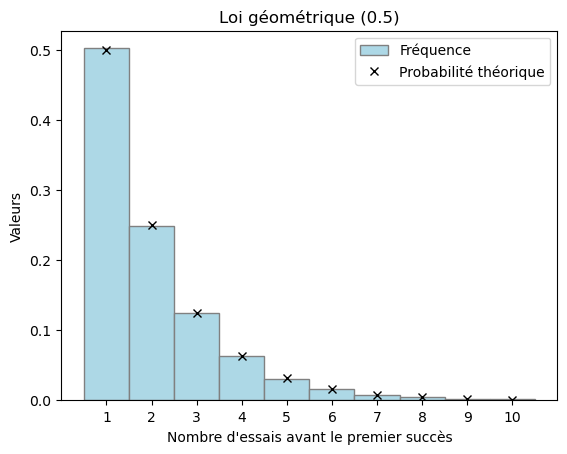

Espérance simulée : 1.99814
Espérance théorique : 2.0
Variance simulée : 2.0000965403999995
Variance théorique : 2.0


In [36]:
# Paramètres
n=10
p=1/2
taille=100_000

# Simulation
Liste = np.random.geometric(p, taille)

# Probabilités théoriques
P = [p*(1-p)**i for i in range(n)]

# Abscisses
X = list(range(1, n+1))

# Représentation graphique
mpl.hist(Liste, X+[n+1], edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

mpl.plot(X, P, 'x', label='Probabilité théorique', color='black')
mpl.title(f"Loi géométrique ({p})")
mpl.xticks(X)
mpl.xlabel("Nombre d'essais avant le premier succès")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {1/p}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {(1-p)/p**2}")

## La loi de Poisson

La loi de Poisson est une loi de probabilité discrète utilisée pour modéliser le nombre d’événements qui se produisent dans un intervalle de temps ou d’espace, lorsque ces événements sont indépendants et se produisent à un taux constant.

Une variable aléatoire $X$ suit une loi de Poisson de paramètre $\lambda$ (le taux moyen d'événements), $X\sim\mathcal{P}(\lambda)$, si elle prend des valeurs dans {1, 2, 3, ...} avec la probabilité :

$$P(X = n) = \frac{\lambda^{n}e^{-\lambda}}{n!}$$

Dans ce cas la variance est égale à l'espérance, est égale à $\lambda$.

Pour simuler une variable aléatoire suivant une loi de Poisson, on utilise la fonction $numpy.random.poisson$.

### Syntaxe 

$numpy.random.poisson(lambda, taille)$

- $lambda$ : paramètre $\lambda>0$.
- $taille$ : nombre de simulations.

La fonction renvoie une liste contenant le nombre d'événements observés pour chaque simulation.

### Exemple

Un être humain mange 3 fois par jour. Quelle est la probabilité de manger 0, 1, 2, ..., 10 fois par jour?

$$X\sim\mathcal{P}(3)$$

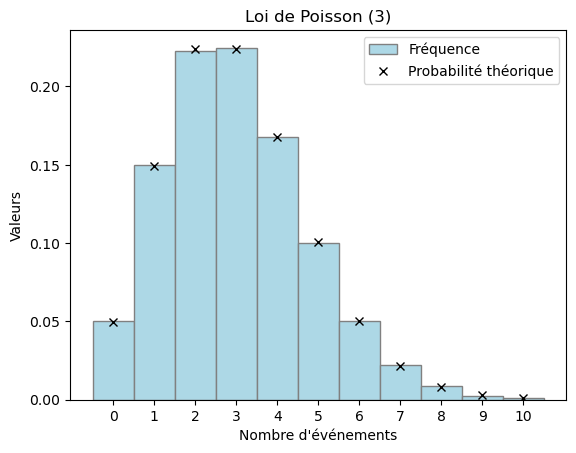

Espérance simulée : 3.00188
Espérance théorique : 3
Variance simulée : 3.0188364656
Variance théorique : 3


In [38]:
# Paramètres
n=10
Lambda=3
taille=100_000

# Simulation
Liste = np.random.poisson(Lambda, taille)

# Probabilités théoriques
P = [(Lambda**i * math.exp(-Lambda)) / math.factorial(i) for i in range(n+1)]

# Abscisses
X = list(range(n+1))

# Représentation graphique
mpl.hist(Liste, X+[n+1], edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

mpl.plot(X, P, 'x', label='Probabilité théorique', color='black')
mpl.title(f"Loi de Poisson ({Lambda})")
mpl.xticks(np.arange(11))
mpl.xlabel("Nombre d'événements")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {Lambda}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {Lambda}")

# Simulation de variables aléatoires à densité  


## La loi exponentielle

La loi exponentielle est une loi de probabilité utilisée pour modéliser des phénomènes aléatoires associés à des durées, comme le temps d’attente entre deux événements successifs dans un processus aléatoire.

Une variable aléatoire $X$ suit une loi exponentielle de paramètre $\lambda$, $X\sim\mathcal{E}(\lambda)$, si sa densité de probabilité est donnée par :

$$f(x)=\lambda e^{-\lambda x},\> x\in \rm I\!R_+^*$$
         
$\lambda>0$ est appelé le taux ou intensité d'occurrence (plus $\lambda$ est grand, plus les durées sont courtes). Alors le temps moyen d'attente ou l'espérance est donnée par $\frac{1}{\lambda}$ et la variance $\frac{1}{\lambda^2}$.

### Syntaxe

$numpy.random.exponential(\frac{1}{\lambda}, taille)$

- $\lambda$ : le taux ou intensité d'occurrence $>0$.
- $taille$ : nombre de simulations.

### Exemple 

Supposons qu'un client attend des taxis à un certain arrêt. Les taxis arrivent à cet arrêt de manière aléatoire, avec une moyenne de 20 taxis par heure, soit $\frac{1}{3}$ par minute. On veut modéliser le temps d'attente en minutes entre deux arrivées de taxis.
Alors $X\sim\mathcal{E}(\frac{1}{3})$

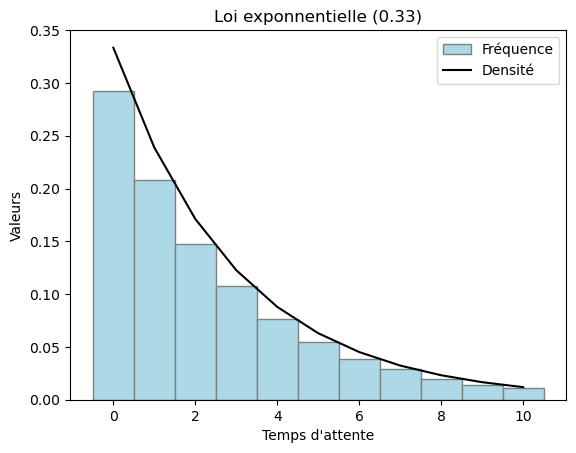

Espérance simulée : 2.994541966663418
Espérance théorique : 3.0
Variance simulée : 9.058135322583864
Variance théorique : 9.0


In [40]:
# Paramètres 
Lambda=1/3
taille = 100_000

# Simulation
Liste = np.random.exponential(1/Lambda, taille)

# Abscisses 
X = np.arange(11)

# Représentation graphique des fréquences
mpl.hist(Liste, np.append(X,11), edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

# Représentation graphique de la densité
mpl.plot(X, Lambda*np.exp(-Lambda*X), label='Densité', color='black')

mpl.title(f"Loi exponnentielle ({round(Lambda,2)})")
mpl.xlabel("Temps d'attente")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {1/Lambda}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {1/Lambda**2}")

On observe graphiquement que les aires des rectangles formant l’histogramme des fréquences sont proches des aires délimitées par la courbe représentative de la densité. On peut donc conclure que 
$exponentielle(\lambda)$ renvoie bien des simulations suivant cette loi.

## La loi normale

Une variable aléatoire $X$ suit une loi normale de paramètre $\mu$ et $\sigma$, $X\sim\mathcal{N}(\mu,\sigma^2)$, si sa densité de probabilité est donnée par :

$$f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}},\> x \in \rm I\!R$$

Où : 

- $\mu$ représente la moyenne, détermine le centre de la courbe.
- $\sigma$ représente l'écart type, détermine la largeur (ou dispersion) de la courbe.

### Syntaxe

$numpy.random.normal(\mu, \sigma, taille)$

- $\mu$ : moyenne
- $\sigma$ : écart type
- $taille$ : nombre de simulations

### Exemple

On suppose que les notes d'un examen suivent une distribution normale avec une moyenne de 15 et un écart type de 2, $X\sim \mathcal{N}(15,4)$, et on souhaite générer les notes d'une classe de 100 élèves et afficher l'histogramme des notes :

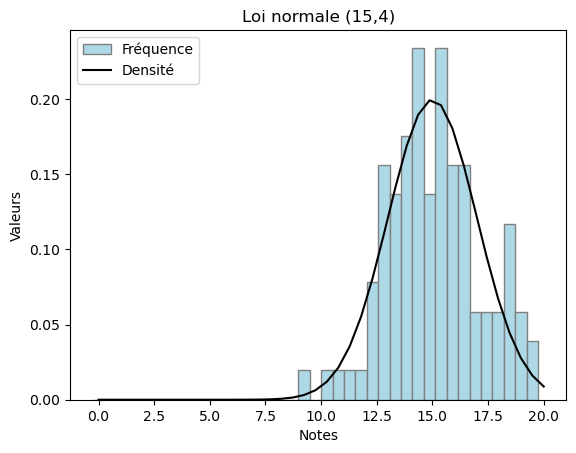

Espérance simulée : 15.310664860936878
Espérance théorique : 15
Variance simulée : 4.456622518818578
Variance théorique : 4


In [43]:
# Paramètres 
mu=15
sigma=2
effectif=100

# Simulation : La fonction génère et renvoie une liste de 100 valeurs aléatoires suivant cette loi normale.
Liste = np.random.normal(mu, sigma, effectif)

X = np.linspace(0, 20, 40)   #Génération d'une liste de 40 abscisses entre 0 et 20

# Représentation graphique des fréquences
mpl.hist(Liste, X, edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='left')

# Représentation graphique de la densité
D = np.exp(-(X-mu)**2/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma)
mpl.plot(X, D, label='Densité', color='black')

mpl.title(f"Loi normale ({mu},{sigma**2})")
mpl.xlabel("Notes")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {mu}")

# Comparaison entre la variance théorique et la variance simulée  
print(f"Variance simulée : {np.var(Liste)}")
print(f"Variance théorique : {sigma**2}")

# Théorème central limite

Le théorème central limite stipule que la moyenne (ou la somme) d'un grand nombre de variables aléatoires indépendantes, issues d'une même distribution, tend vers une loi normale lorsque le nombre de variables devient grand.

Si la distribution d'origine a une moyenne $\mu$ et une variance $\sigma^2$, la distribution de la moyenne de l'échantillon aura $\mu$ comme moyenne et $\frac{\sigma^2}{n}$ comme variance.
	
On peut utiliser ce théorème pour simuler une loi normale à partir d'une autre distribution, comme une distribution uniforme.

On répète plusieurs fois :

- la génération de plusieurs variables aléatoires indépendantes suivant une distribution uniforme en utilisant la fonction $numpy.random.uniform$. 

- le calcul de la moyenne de ces variables.

Finalement, on représente graphiquement la densité de la nouvelle distribution normale et l'histogramme des moyennes calculées.

## Exemple

On génère uniformément sur [0, 20] les notes de 30 élèves pour 1000 classes :

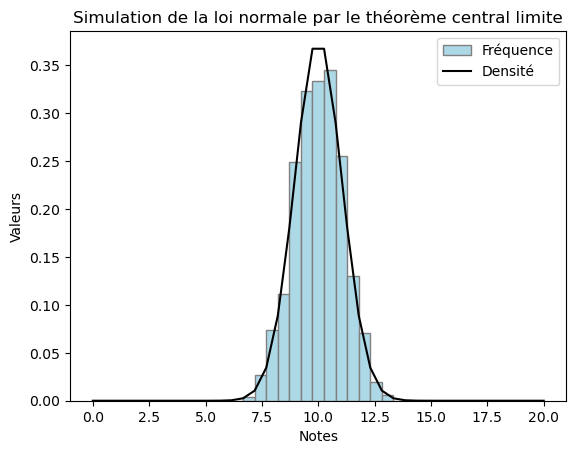

Espérance simulée : 10.01568403544213
Espérance théorique : 10.0


In [108]:
# Paramètres
nc = 1000   # nombre de classes

Liste = []
for _ in range(nc):
    #Calcul de la moyenne de 30 variables aléatoires uniformes sur (0, 20)
    moyenne = np.mean(np.random.uniform(0,20,30))   
    Liste.append(moyenne)

mu = (0+20)/2                                   #Espérance de la loi uniforme sur (0,20)
sigma = math.sqrt((20-0)**2/12)/math.sqrt(30)   #Écart type de la nouvelle distribution 

# Abscisses (Les notes)
X = np.linspace(0, 20, 40)

# Affichage de l'histogramme
mpl.hist(Liste, X, edgecolor='gray', color='lightblue', density=True, label='Fréquence', align='mid')

# Densité de la loi normale théorique
D = np.exp(-(X-mu)**2/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma)
mpl.plot(X, D, label='Densité', color='black')

mpl.title('Simulation de la loi normale par le théorème central limite')
mpl.xlabel('Notes')
mpl.ylabel('Valeurs')
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et l'espérance simulée  
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {mu}")